In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis

In [2]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.formula.api as smf

import statsmodels.stats.multicomp as mc

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

sns.set_palette("viridis")

In [3]:
# Getting the data frame

results_clean = []
df = pd.read_csv("chatgpt_sentiments_autism_03_09_2024_official.csv", low_memory=False)

print(df)

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -1.067903
1     Abn_Barlow_05_Autism_v2.docx -1.201894
2     Abn_Barlow_06_Autism_v2.docx -1.142122
3        Abn_Barlow_07_Autism.docx -0.293995
4        Abn_Barlow_08_Autism.docx  0.267891
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx  0.409645
214  Spcl_Vaughn_04_Autism_v2.docx  0.301315
215  Spcl_Vaughn_05_Autism_v2.docx  0.184093
216  Spcl_Vaughn_06_Autism_v2.docx  0.220501
217     Spcl_Vaughn_07_Autism.docx -0.534654

[218 rows x 2 columns]


,Mean,Standard Deviation
Field,,
Abn,-0.639956,0.640895
Devo,-0.044966,1.300759
GS,-0.280877,2.052955
HS,-0.292144,1.767619
Intro,0.219623,1.677010
Neuro,0.099139,1.013630
Socl,-0.457217,1.544341
Spcl,0.493023,0.552896


F_onewayResult(statistic=4.058636585494401, pvalue=0.0003390104109485797)


group1,group2,meandiff,p-adj,lower,upper,reject
Abn,Devo,0.595,0.256,-0.17,1.3599,False
Abn,GS,0.3591,0.9995,-1.705,2.4232,False
Abn,HS,0.3478,0.995,-1.0575,1.7532,False
Abn,Intro,0.8596,0.0271,0.0546,1.6645,True
Abn,Neuro,0.7391,0.1047,-0.0738,1.552,False
Abn,Socl,0.1827,0.9994,-0.8472,1.2127,False
Abn,Spcl,1.133,0.0001,0.4218,1.8441,True
Devo,GS,-0.2359,1.0,-2.3153,1.8435,False
Devo,HS,-0.2472,0.9995,-1.6749,1.1806,False
Devo,Intro,0.2646,0.9793,-0.5788,1.108,False


,Mean,Standard Deviation
Field,,
Abn,-0.639956,0.640895
Devo,-0.044966,1.300759
GS,-0.280877,2.052955
HS,-0.292144,1.767619
Intro,0.219623,1.677010
Neuro,0.099139,1.013630
Socl,-0.457217,1.544341
Spcl,0.493023,0.552896


                          Textbook     Score  Author Field Edition     Slope
0     Abn_Barlow_04_Autism_v2.docx -1.067903  Barlow   Abn      04  0.357949
1     Abn_Barlow_05_Autism_v2.docx -1.201894  Barlow   Abn      05  0.357949
2     Abn_Barlow_06_Autism_v2.docx -1.142122  Barlow   Abn      06  0.357949
3        Abn_Barlow_07_Autism.docx -0.293995  Barlow   Abn      07  0.357949
4        Abn_Barlow_08_Autism.docx  0.267891  Barlow   Abn      08  0.357949
..                             ...       ...     ...   ...     ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx  0.409645  Vaughn  Spcl      13 -0.071593
214  Spcl_Vaughn_04_Autism_v2.docx  0.301315  Vaughn  Spcl      13  0.000000
215  Spcl_Vaughn_05_Autism_v2.docx  0.184093  Vaughn  Spcl      02 -2.313957
216  Spcl_Vaughn_06_Autism_v2.docx  0.220501  Vaughn  Spcl      03 -2.313957
217     Spcl_Vaughn_07_Autism.docx -0.534654  Vaughn  Spcl      09  0.000000

[218 rows x 6 columns]


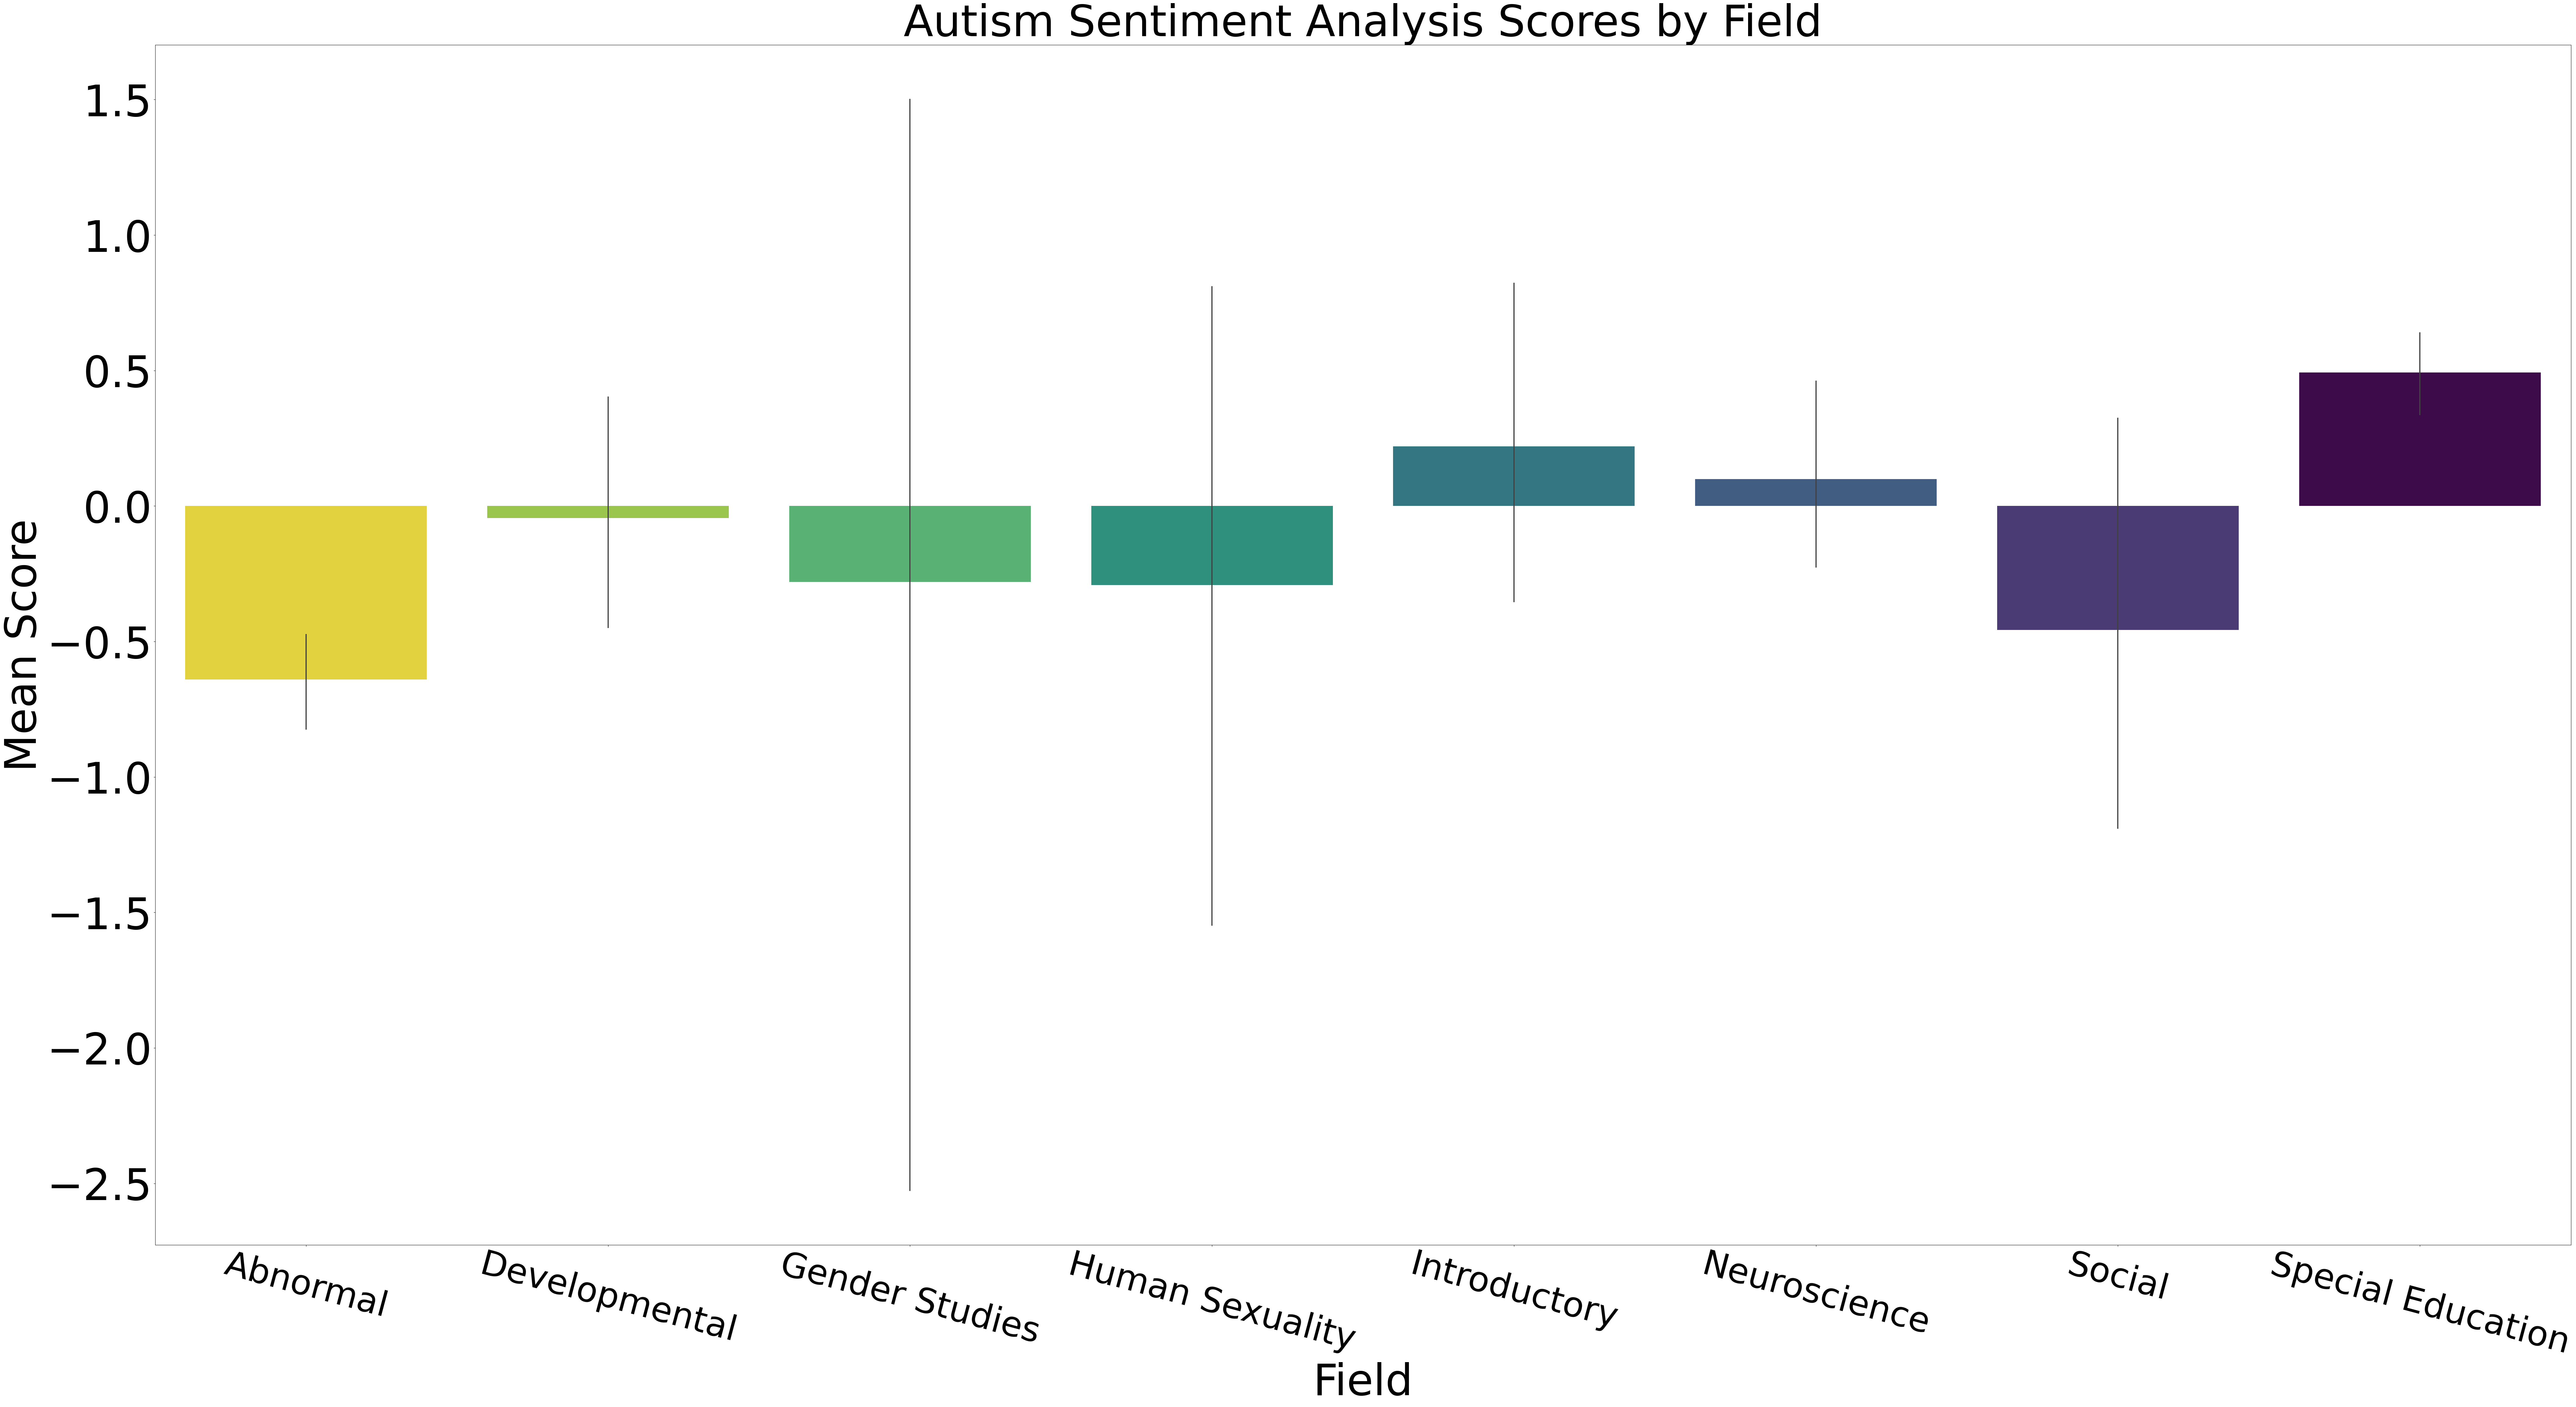

In [27]:
# Field Analysis

# Break up the data frame into fields

field_df = df

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*", "GS.*", "HS.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Devo_Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn", 
                 "GS_Newman", "Rothenberg", "Wood", "Carroll", "Crooks", "Hyde", "LeVay", "Yarber"]


for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

# Find means

field_intermediary_df = field_df[["Score", "Field"]]
field_means_df = field_intermediary_df.groupby(["Field"]).mean()
field_means_df = field_means_df.rename(columns={"Score":"Mean"})
field_stdev_df = field_intermediary_df.groupby(["Field"]).std()
field_stdev_df = field_stdev_df.rename(columns={"Score":"Standard Deviation"})


field_stats_df = pd.concat([field_means_df, field_stdev_df], axis="columns")

display(field_stats_df)

# Do ANOVA

# print(field_df[field_df['Field'] == 'Devo']["Score"])

anova = f_oneway(field_df[field_df['Field'] == 'Abn']["Score"], field_df[field_df['Field'] == 'Devo']['Score'],
        field_df[field_df['Field'] == 'GS']['Score'], field_df[field_df['Field'] == 'HS']['Score'],
        field_df[field_df['Field'] == 'Intro']['Score'], field_df[field_df['Field'] == 'Neuro']['Score'], 
        field_df[field_df['Field'] == 'Socl']['Score'], field_df[field_df['Field'] == 'Spcl']['Score'])

print(anova)

field_df.to_csv('field_df_autism_chatgpt.csv', index=True)

# Post-hoc testing

comp = mc.MultiComparison(df['Score'], df['Field'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

display(field_stats_df)

fig, ax = plt.subplots(figsize=(100, 50))

print(field_df)

viridis_dict = {"Abn":"#fde725" , "Devo":"#a0da39" , "GS":"#4ac16d" , "HS":"#1fa187" , "Intro":"#277f8e" , "Neuro":"#365c8d" , "Socl":"#46327e" , "Spcl":"#440154"}

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score", palette=viridis_dict
)
# ax.bar_label(ax.containers[0], fontsize=10);

# ax.errorbar(mean.index, mean)
ax.set_title("Autism Sentiment Analysis Scores by Field", fontsize=100)
ax.set_ylabel("Mean Score", fontsize=100)
ax.set_xlabel("Field", fontsize=100)
plt.yticks(fontsize=100)
plt.xticks(fontsize=80, rotation=-15)
ax.set_xticklabels(["Abnormal", "Developmental", "Gender Studies", "Human Sexuality", "Introductory", "Neuroscience", "Social", "Special Education"])
plt.savefig('fields_autism_chatgpt.png')

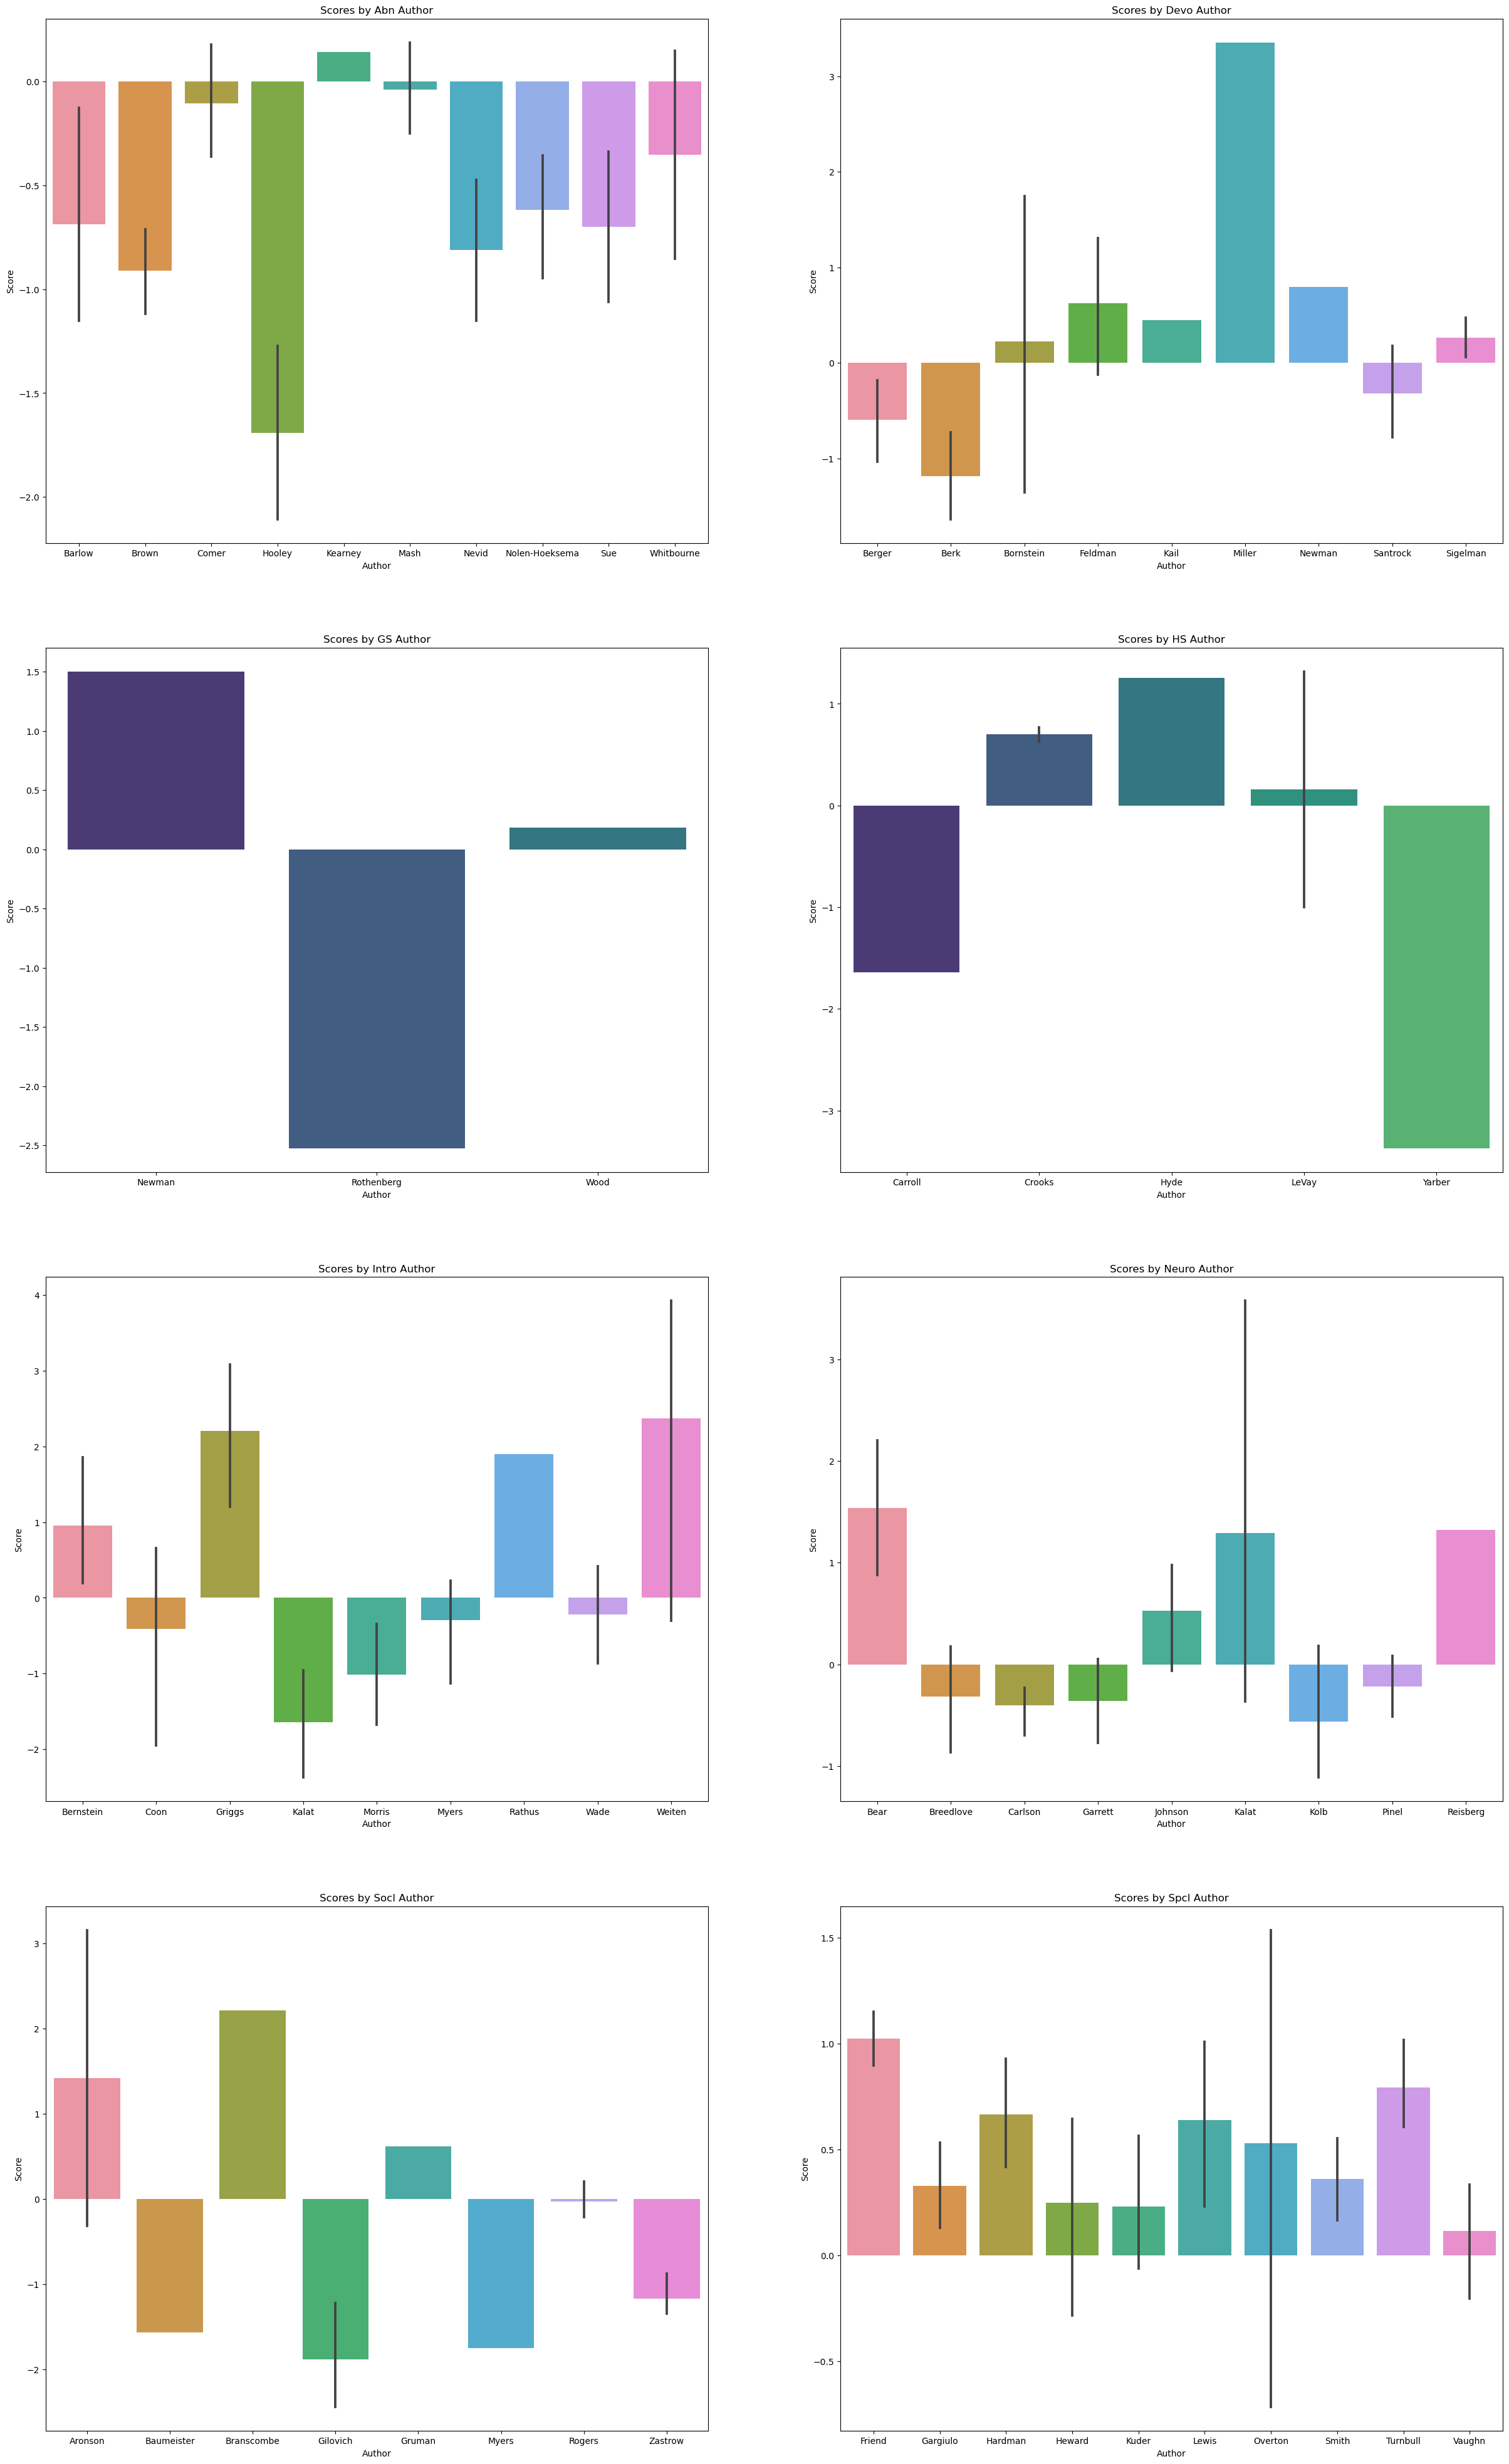

In [10]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df

all_authors = []

for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
    all_authors.append(author_l)

author_means_df = author_df

fig, ax = plt.subplots(4, 2, figsize = (30,50))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='GS'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='HS'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][1],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][0],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][1],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Abn Author")
ax[0][1].set_title("Scores by Devo Author")
ax[1][0].set_title("Scores by GS Author")
ax[1][1].set_title("Scores by HS Author")

ax[2][0].set_title("Scores by Intro Author")
ax[2][1].set_title("Scores by Neuro Author")
ax[3][0].set_title("Scores by Socl Author")
ax[3][1].set_title("Scores by Spcl Author")

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "authors_autism_" + str(counter) + "_" + str(subcounter) + "_chatgpt.png"
#         ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1


C:\Users\maksi\AppData\Local\Temp\ipykernel_19824\3739336087.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_19824\3739336087.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_19824\3739336087.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

[                      Textbook    Score       Author Field Edition  Slope
70  Devo_Miller_06_Autism.docx  3.35473  Devo_Miller  Devo      06    0.0,                              Textbook     Score       Author  Field Edition  \
95     Intro_Bernstein_08_Autism.docx  0.019590  Intro_Kalat  Intro      09   
96  Intro_Bernstein_09_Autism_v2.docx  2.320630  Intro_Kalat  Intro      10   
97     Intro_Bernstein_10_Autism.docx  1.548437  Intro_Kalat  Intro      11   

       Slope  
95  0.391834  
96  0.391834  
97  0.391834  ,                         Textbook     Score         Author  Field Edition  \
120    Intro_Wade_12_Autism.docx  0.421290  Neuro_Carlson  Intro      09   
121  Intro_Weiten_06_Autism.docx  3.491260  Neuro_Carlson  Intro      10   
122  Intro_Weiten_08_Autism.docx  3.924720  Neuro_Carlson  Intro      11   
123  Intro_Weiten_10_Autism.docx -0.305003  Neuro_Carlson  Intro      12   

        Slope  
120  0.163945  
121  0.163945  
122  0.163945  
123  0.163945  ,           

<Axes: xlabel='Edition', ylabel='Score'>

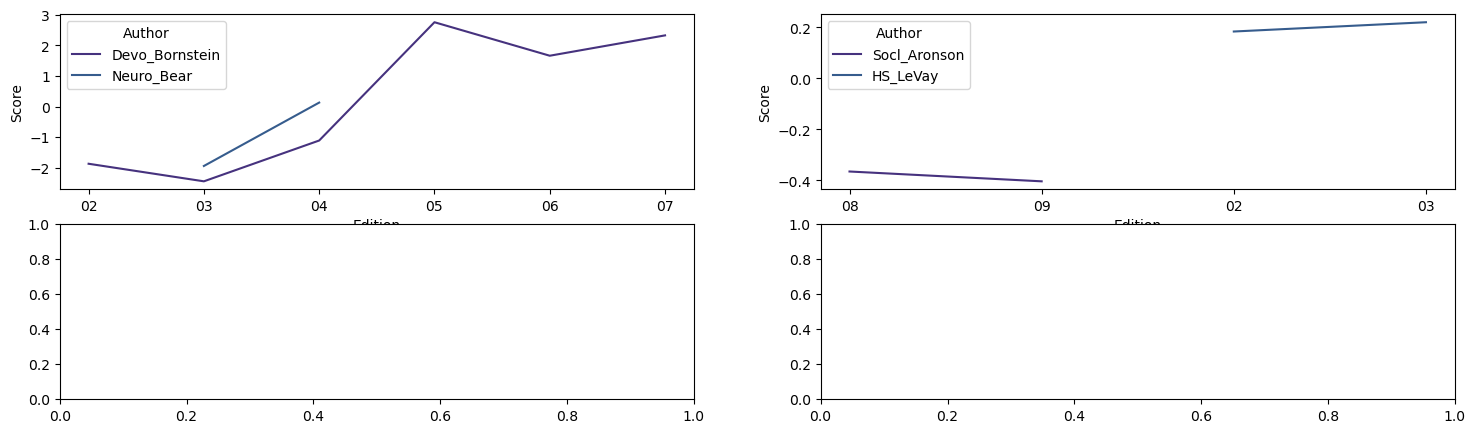

In [11]:
# Edition Analysis

edition_df = df


# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
    if len(a_df["Edition"]) > 0:
        res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
        for l in alphabetical:
            if len(alphabetical) > 1:
                slope.append(res.slope)
            else:
                slope.append(0)

edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope

# Find consistently positive/negative authors
author_dfs_pos = []
author_dfs_neg = []
authors = edition_df["Author"].unique()
for author in authors:
    single_author_df = edition_df[edition_df["Author"] == author]
    if single_author_df["Score"].mean() > 1:
        author_dfs_pos.append(single_author_df)

    elif single_author_df["Score"].mean() < -1: # if they're consistent, their means will be above or below also
        author_dfs_neg.append(single_author_df)
        
print(author_dfs_pos)
print(author_dfs_neg)

fig, axes = plt.subplots(2, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] >= 1]
sns.lineplot(ax = axes[0][0], x="Edition", y="Score", hue="Author", data=high)

low = edition_df[edition_df["Slope"] <= -1]
sns.lineplot(ax = axes[0][1], x="Edition", y="Score", hue="Author", data=low)

# positive = author_dfs[author_dfs["Score"].mean() > 1]
# sns.barplot(ax = axes[1][0], x="Author", y="Score", data=positive)

# negative = author_dfs[author_dfs["Score"].mean() < -1]
# sns.barplot(ax = axes[1][0], x="Author", y="Score", data=negative)

      Year     Score
1988  1988 -1.867855
1992  1992 -2.441956
1995  1995 -0.403737
1996  1996 -0.220810
1997  1997 -0.343447
1998  1998 -0.867313
1999  1999 -1.108525
2000  2000 -0.252563
2001  2001 -0.508578
2002  2002 -0.342893
2003  2003 -0.089278
2004  2004  0.243029
2005  2005 -0.091470
2006  2006 -0.510913
2007  2007 -0.336079
2008  2008 -0.190138
2009  2009 -0.663741
2010  2010  0.158882
2011  2011 -0.483683
2012  2012  0.176701
2013  2013  0.261321
2014  2014  0.349156
2015  2015  0.221635
2016  2016  0.264885
2017  2017  0.089964
2018  2018  0.836453


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     34.83
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           4.34e-06
Time:                        15:20:39   Log-Likelihood:                -15.076
No. Observations:                  26   AIC:                             34.15
Df Residuals:                      24   BIC:                             36.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -130.9255     22.131     -5.916      0.000    -176.601     -85.250
Year           0.0651      0.011      5.902      0.000       0.042       0.088
==============================================================================
Omnibus:                        5.048   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                3.175
Skew:                          -0.737   Prob(JB):                        0.204
Kurtosis:                       3.870   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

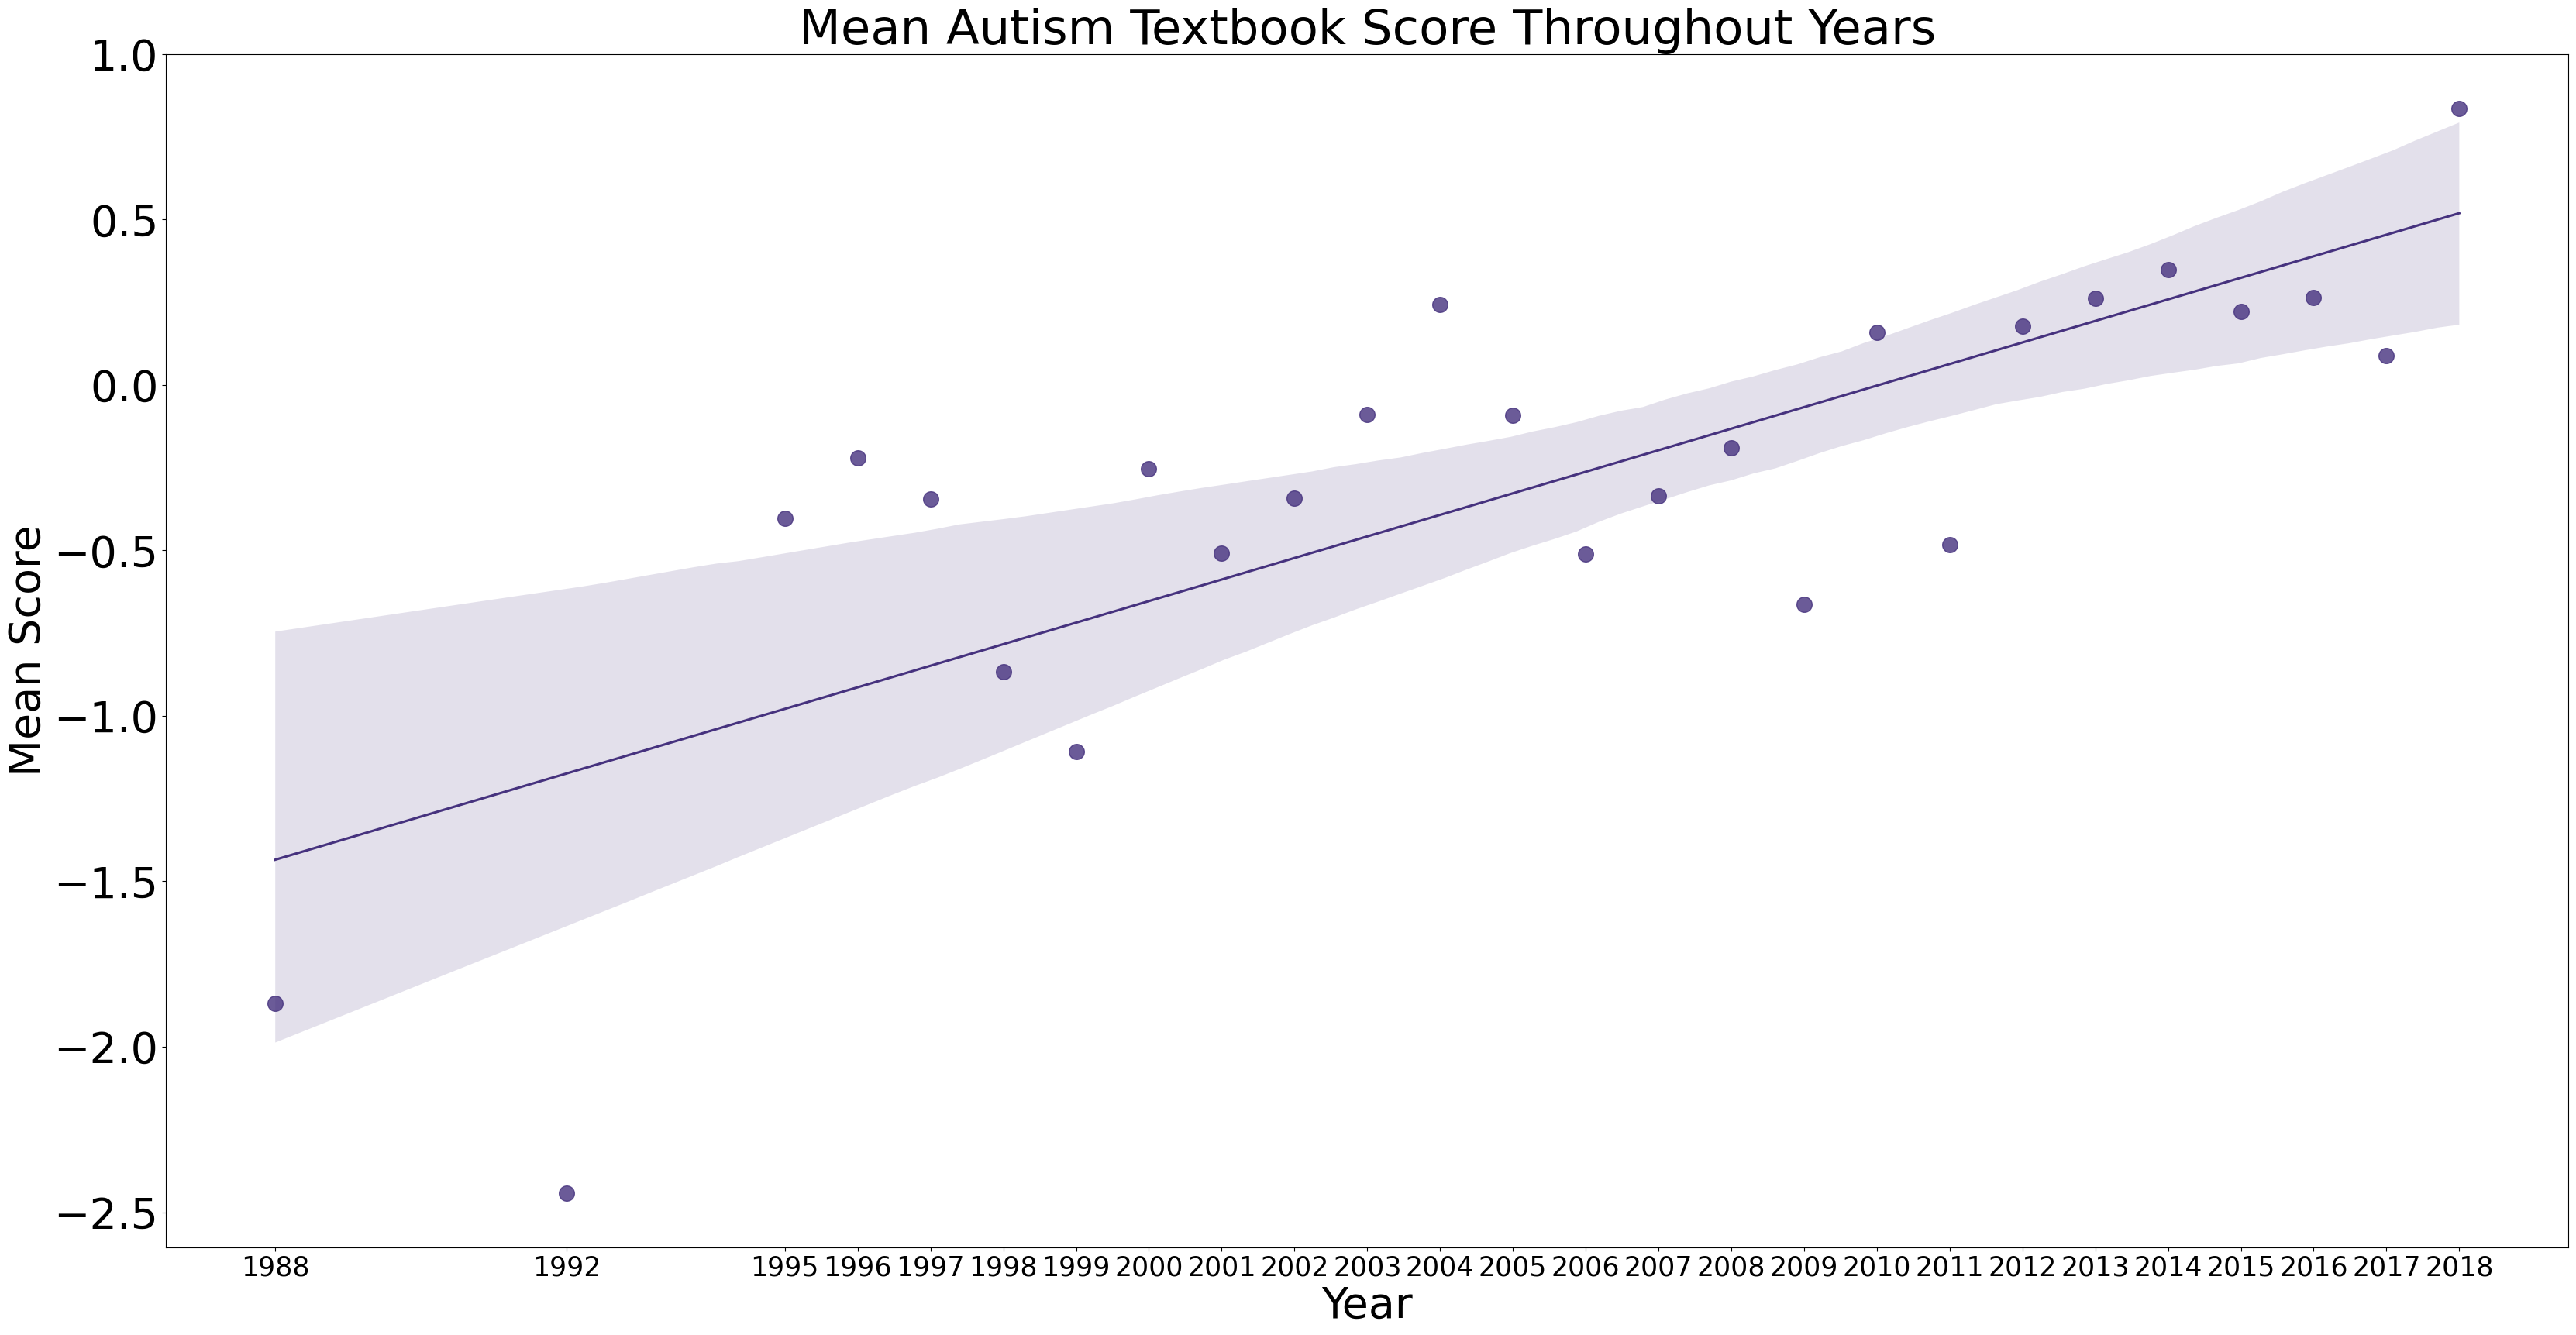

In [12]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Autism"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    
# Find mean of the books in each year
year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]

# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()



print(graphing_years)

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

graphing_years.to_csv('graphing_years_chatgpt_autism.csv', index=True)

# results = sm.OLS(graphing_years["Score"], graphing_years["Year"]).fit()
# results = model.fit()
# results = smf.ols(formula='Score ~ Year', data=graphing_years).fit()

# model = sm.OLS(graphing_years["Score"].tolist(), graphing_years["Year"].tolist())

# results = model.fit()

# print(results.summary())
# display(results.summary())

# print("coefficient: ", results.params)

res = smf.ols(formula='Score ~ Year', data=graphing_years).fit() # y ~ x
display(res.summary())

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(40, 20)) 

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years, scatter_kws={'s':200});
# sns.set(font_scale=2)

ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Autism Textbook Score Throughout Years", fontsize = 45)
plt.xticks(fontsize=25)
plt.yticks(fontsize=40)
plt.xlabel('Year', fontsize=40)
plt.ylabel('Mean Score', fontsize=40)
plt.savefig('years_autism_chatgpt.png')


    index  Year     Score Field
18   2018  2018  0.445671  Spcl
9    2008  2008  0.468820  Spcl
0    1996  1996  0.115069  Spcl
1    1998  1998 -0.117558  Spcl
2    2000  2000  0.310425  Spcl
..    ...   ...       ...   ...
16   2015  2015  0.267597   Abn
17   2016  2016  0.105781   Abn
18   2017  2017 -0.452105   Abn
19   2018  2018  0.049590   Abn
0    1996  1996 -0.556688   Abn

[100 rows x 4 columns]
All fields:                              OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     16.20
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           0.000112
Time:                        15:20:49   Log-Likelihood:                -127.53
No. Observations:                 100   AIC:                             259.1
Df Residuals:             

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     4.334
Date:                Sun, 07 Apr 2024   Prob (F-statistic):             0.0519
Time:                        15:20:50   Log-Likelihood:                -9.8678
No. Observations:                  20   AIC:                             23.74
Df Residuals:                      18   BIC:                             25.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.2438     31.041     -2.102      0.050    -130.458      -0.029
Year           0.0322      0.015      2.082      0.052      -0.000       0.065
==============================================================================
Omnibus:                        0.762   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.706
Skew:                           0.157   Prob(JB):                        0.702
Kurtosis:                       2.135   Cond. No.                     6.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     19.81
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           0.000309
Time:                        15:20:51   Log-Likelihood:                -23.030
No. Observations:                  20   AIC:                             50.06
Df Residuals:                      18   BIC:                             52.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -196.2898     44.041     -4.457      0.000    -288.816    -103.764
Year           0.0977      0.022      4.451      0.000       0.052       0.144
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   2.531
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.018
Skew:                          -0.062   Prob(JB):                        0.991
Kurtosis:                       2.920   Cond. No.                     4.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.9005
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.413
Time:                        15:20:51   Log-Likelihood:                -8.2787
No. Observations:                   5   AIC:                             20.56
Df Residuals:                       3   BIC:                             19.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    603.9014    636.503      0.949      0.413   -1421.735    2629.538
Year          -0.2999      0.316     -0.949      0.413      -1.306       0.706
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.268
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.231
Skew:                           0.018   Prob(JB):                        0.891
Kurtosis:                       1.949   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.4280
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.524
Time:                        15:20:51   Log-Likelihood:                -25.202
No. Observations:                  16   AIC:                             54.40
Df Residuals:                      14   BIC:                             55.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.8006    136.266     -0.652      0.525    -381.062     203.461
Year           0.0443      0.068      0.654      0.524      -0.101       0.190
==============================================================================
Omnibus:                        1.206   Durbin-Watson:                   2.556
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.962
Skew:                           0.541   Prob(JB):                        0.618
Kurtosis:                       2.478   Cond. No.                     8.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     4.903
Date:                Sun, 07 Apr 2024   Prob (F-statistic):             0.0453
Time:                        15:20:51   Log-Likelihood:                -10.783
No. Observations:                  15   AIC:                             25.57
Df Residuals:                      13   BIC:                             26.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -92.3136     41.676     -2.215      0.045    -182.350      -2.277
Year           0.0459      0.021      2.214      0.045       0.001       0.091
==============================================================================
Omnibus:                        0.432   Durbin-Watson:                   2.434
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.538
Skew:                           0.239   Prob(JB):                        0.764
Kurtosis:                       2.205   Cond. No.                     6.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.360
Method:                 Least Squares   F-statistic:                    0.2066
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.694
Time:                        15:20:51   Log-Likelihood:                -4.5264
No. Observations:                   4   AIC:                             13.05
Df Residuals:                       2   BIC:                             11.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -170.1113    373.357     -0.456      0.693   -1776.537    1436.314
Year           0.0843      0.185      0.455      0.694      -0.713       0.882
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.367
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.508
Skew:                          -0.034   Prob(JB):                        0.776
Kurtosis:                       1.256   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     14.96
Date:                Sun, 07 Apr 2024   Prob (F-statistic):            0.00124
Time:                        15:20:52   Log-Likelihood:             -0.0083603
No. Observations:                  19   AIC:                             4.017
Df Residuals:                      17   BIC:                             5.906
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.5641     18.372     -3.841      0.001    -109.326     -31.803
Year           0.0354      0.009      3.868      0.001       0.016       0.055
==============================================================================
Omnibus:                        1.413   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                0.398
Skew:                          -0.317   Prob(JB):                        0.819
Kurtosis:                       3.317   Cond. No.                     6.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

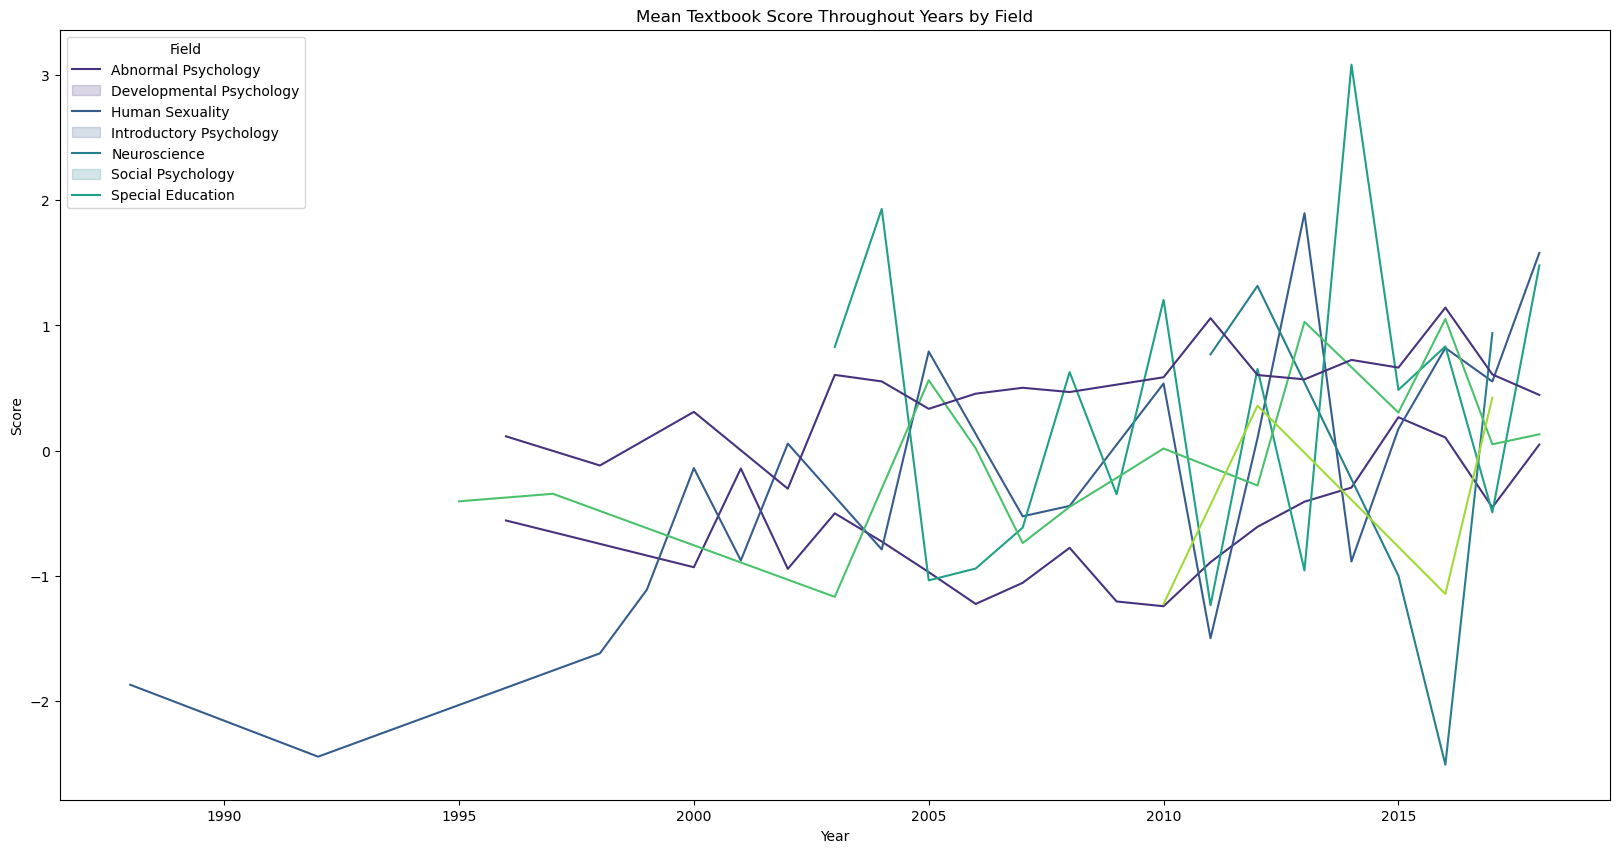

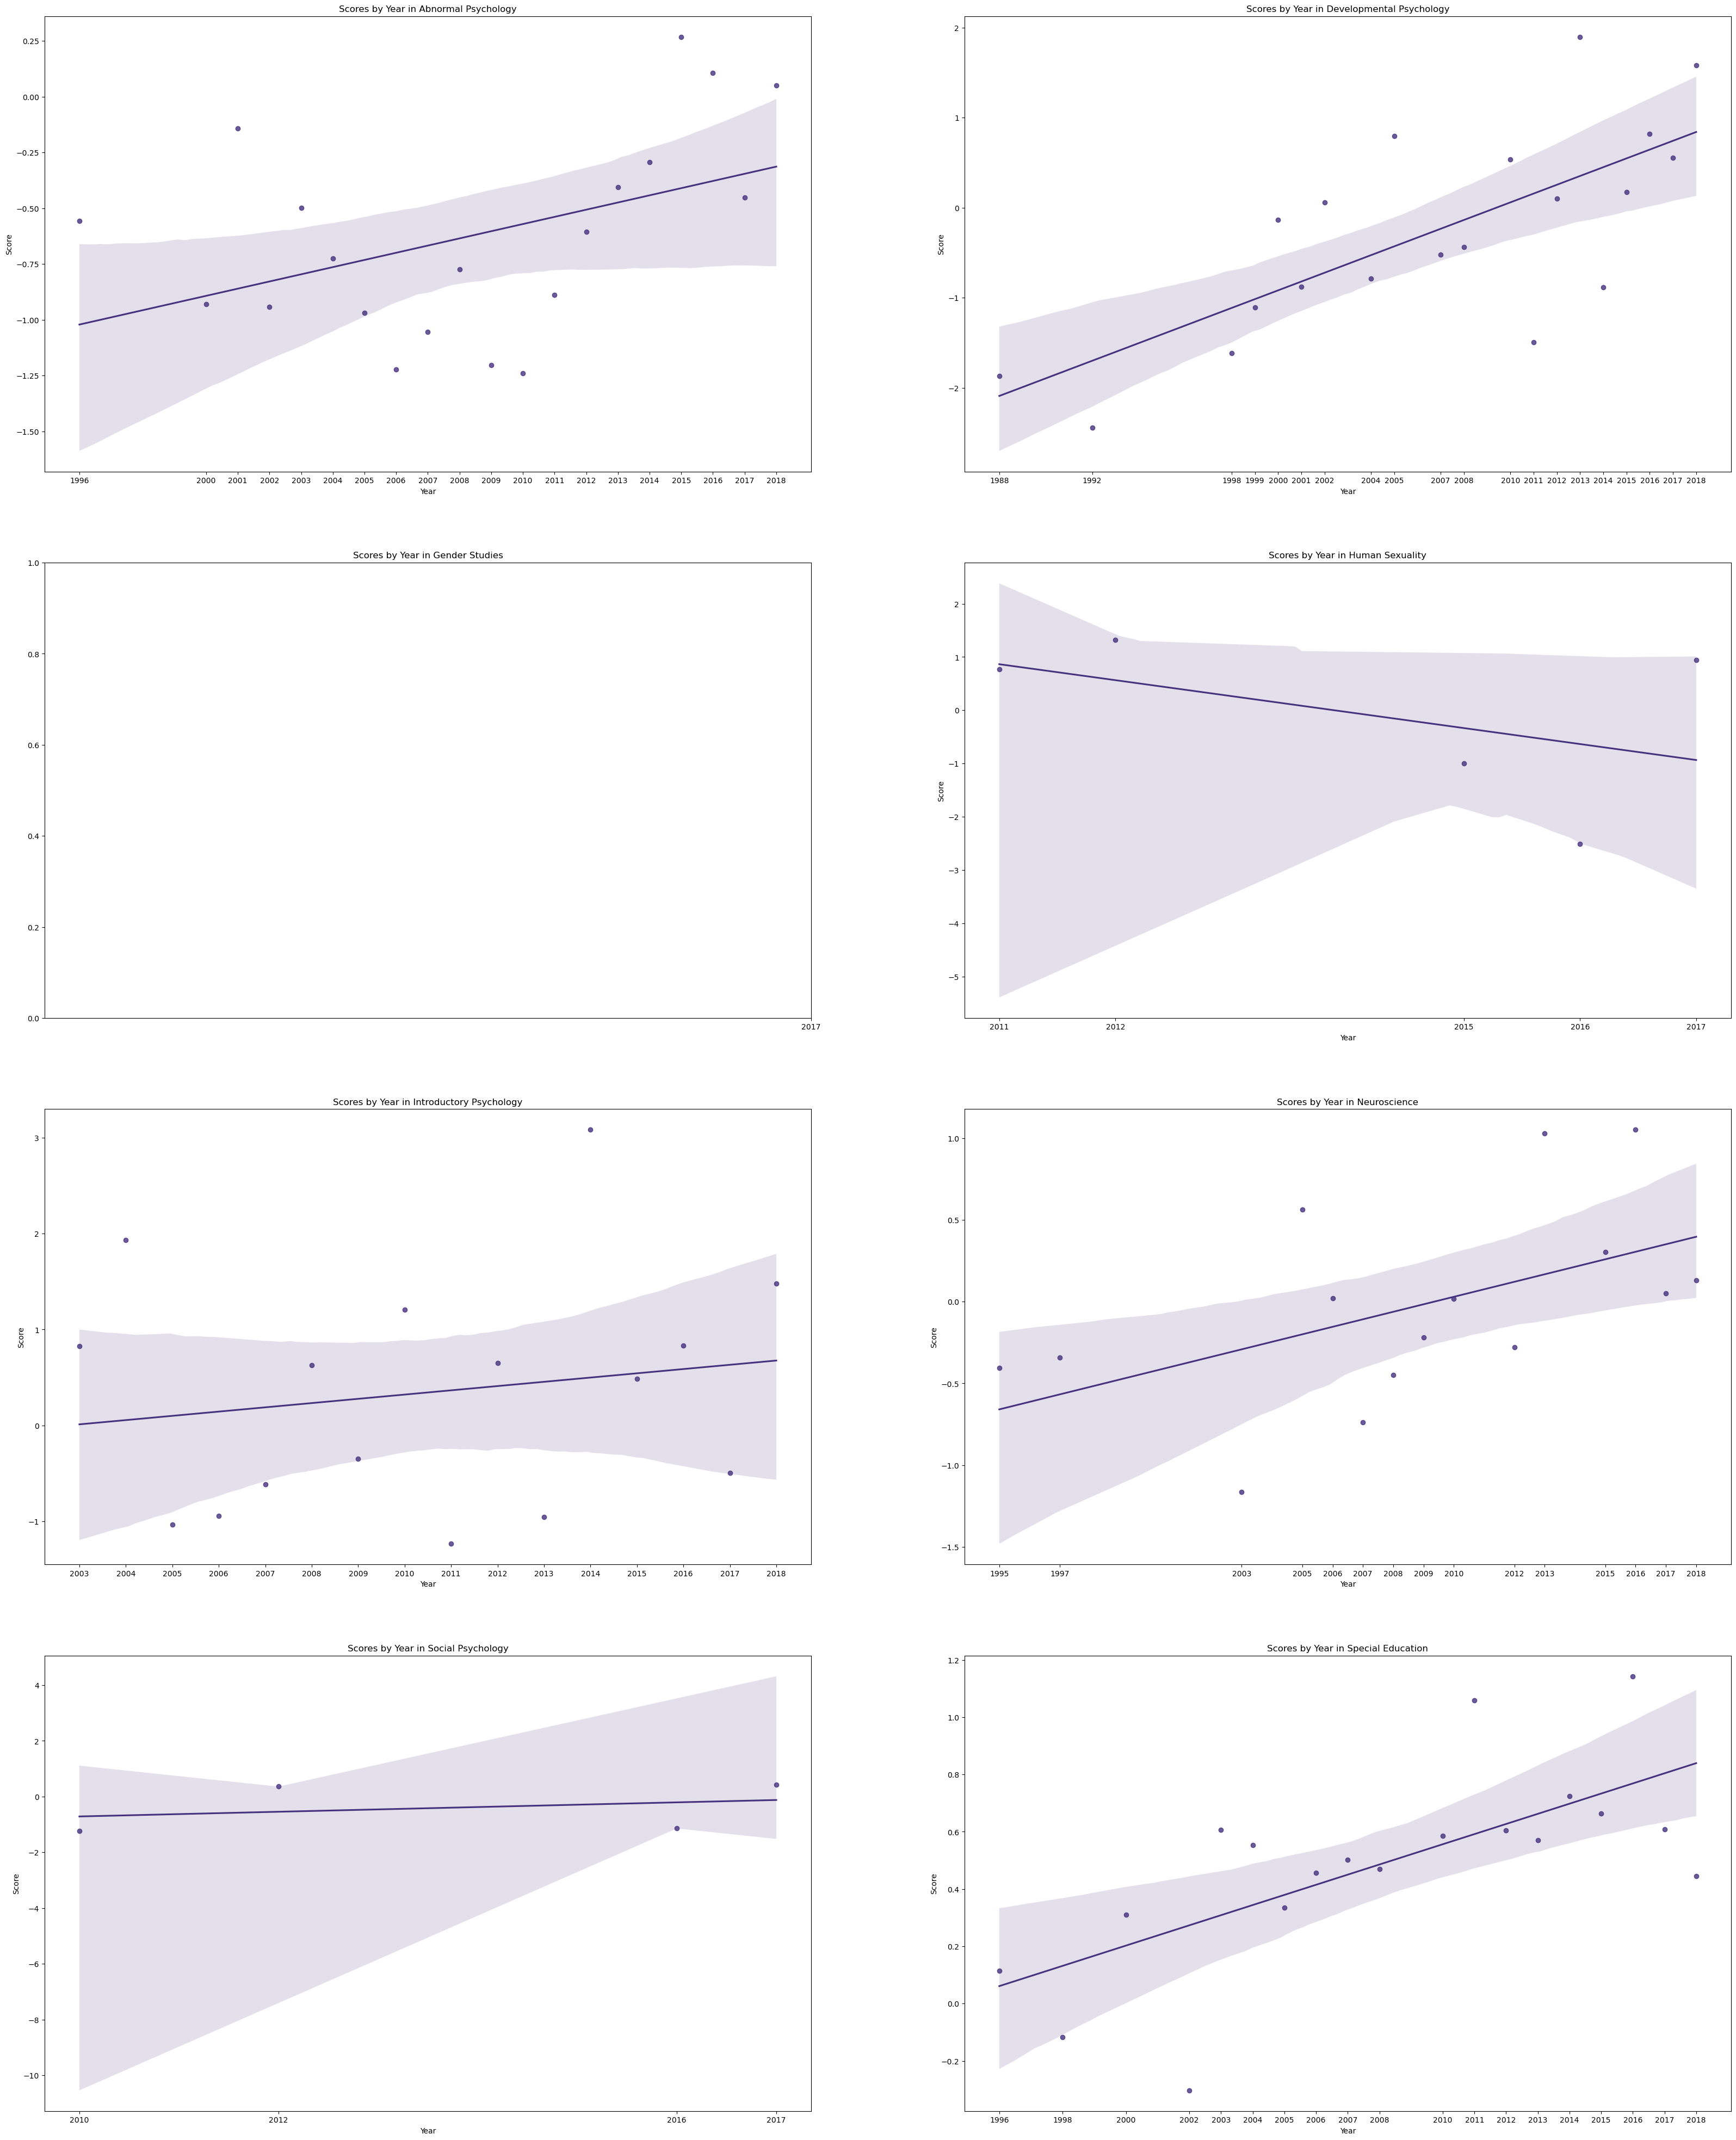

In [13]:
# Years by field

# Year Analysis

year_df = df

# Get a field from the big data frame
def getFieldDF(df, field):
    df1 = df[df['Field'] == field]
    return df1

# Get all the fields
fields = df.Field.unique()

# Make a list where each element is a dataframe with only one field
field_dfs = []
for f in fields:
    f_df = getFieldDF(year_df, f)
    field_dfs.append(f_df)


# print(field_dfs)

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Autism"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year
        
# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books

def getYear(book_df):

    # Overall mean for each year, for all textbooks in a field

    # Find mean of the books in each year
    year_scores = {}
    for year in year_textbooks:
        book_list = year_textbooks[year]
        scores = []
        for book in book_list:
            # Find the book in the df
            string_to_query = "Textbook=='" + book + "'"
            score = book_df.query(string_to_query)["Score"]
            # If the score exists (that is, if the book is in this dataframe)
            if len(score) > 0:
                scores.append(float(score.iloc[0]))
        if len(scores) > 0:
            average = mean(scores)
            year_scores[year] = [year, average]
    
    return year_scores

# Get the years for each field dataframe
year_scores = []
for f_df in field_dfs:
#     print(f_df)
    year_score = getYear(f_df)
#     print(year_score)
    graphing_years = pd.DataFrame.from_dict(year_score, orient="index", columns=["Year", "Score"])
    graphing_years["Field"] = f_df["Field"].iloc[0] # Include the field
    graphing_years = graphing_years.reset_index()
    year_scores.append(graphing_years)

# Graph it

year_scores_all_fields = pd.concat(year_scores)

year_scores_all_fields = year_scores_all_fields.sort_values(by="Field", ascending=False)

print(year_scores_all_fields)

res = smf.ols(formula = "Score ~ Year", data=year_scores_all_fields).fit()
print("All fields: ", res.summary())

# md = smf.mixedlm("Score ~ Year * Field", year_scores_all_fields, groups=year_scores_all_fields["Field"]).fit()
# print("All fields: ", md.summary())

# print(year_scores)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[0])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[1])
# sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[2])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[3])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[4])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[5])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[6])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[7])

# ax.set_xticks(book_years.values())
ax.set_title("Mean Textbook Score Throughout Years by Field")

ax.legend(title="Field", labels=["Abnormal Psychology", "Developmental Psychology", "Human Sexuality", 
                                  "Introductory Psychology", "Neuroscience", "Social Psychology", "Special Education"])
plt.savefig('years_autism_chatgpt_fields_all.png')

fig, ax = plt.subplots(4, 2, figsize = (40,50))

sns.regplot(ax = ax[0][0],
    data=year_scores[0], x="Year", y="Score" # abn
)

res = smf.ols(formula='Score ~ Year', data=year_scores[0]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[0]["Score"].tolist(), year_scores[0]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[0][1],
    data=year_scores[1], x="Year", y="Score" # devo
)

# model = sm.OLS(year_scores[1]["Score"].tolist(), year_scores[1]["Year"].tolist())
# results = model.fit()
# display(results.summary())

res = smf.ols(formula='Score ~ Year', data=year_scores[1]).fit() # y ~ x
display(res.summary())

# sns.regplot(ax = ax[1][0],
#     data=year_scores[2], x="Year", y="Score" # gs
# )

# model = sm.OLS(year_scores[2]["Score"].tolist(), year_scores[2]["Year"].tolist())
# results = model.fit()
# print(results.summary())

sns.regplot(ax = ax[1][1],
    data=year_scores[3], x="Year", y="Score" # hs
)

res = smf.ols(formula='Score ~ Year', data=year_scores[3]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[3]["Score"].tolist(), year_scores[3]["Year"].tolist())
# results = model.fit()
# display(results.summary())



sns.regplot(ax = ax[2][0],
    data=year_scores[4], x="Year", y="Score" # intro
)

res = smf.ols(formula='Score ~ Year', data=year_scores[4]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[4]["Score"].tolist(), year_scores[4]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[2][1],
    data=year_scores[5], x="Year", y="Score" # neuro
)

res = smf.ols(formula='Score ~ Year', data=year_scores[5]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[5]["Score"].tolist(), year_scores[5]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[3][0],
    data=year_scores[6], x="Year", y="Score" # socl
)

res = smf.ols(formula='Score ~ Year', data=year_scores[6]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[6]["Score"].tolist(), year_scores[6]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[3][1],
    data=year_scores[7], x="Year", y="Score" # spcl
)

res = smf.ols(formula='Score ~ Year', data=year_scores[7]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[7]["Score"].tolist(), year_scores[7]["Year"].tolist())
# results = model.fit()
# display(results.summary())


ax[0][0].set_title("Scores by Year in Abnormal Psychology")
ax[0][0].set_xticks(year_scores[0]["Year"])

ax[0][1].set_title("Scores by Year in Developmental Psychology")
ax[0][1].set_xticks(year_scores[1]["Year"])

ax[1][0].set_title("Scores by Year in Gender Studies")
ax[1][0].set_xticks(year_scores[2]["Year"])

ax[1][1].set_title("Scores by Year in Human Sexuality")
ax[1][1].set_xticks(year_scores[3]["Year"])

ax[2][0].set_title("Scores by Year in Introductory Psychology")
ax[2][0].set_xticks(year_scores[4]["Year"])

ax[2][1].set_title("Scores by Year in Neuroscience")
ax[2][1].set_xticks(year_scores[5]["Year"])

ax[3][0].set_title("Scores by Year in Social Psychology")
ax[3][0].set_xticks(year_scores[6]["Year"])

ax[3][1].set_title("Scores by Year in Special Education")
ax[3][1].set_xticks(year_scores[7]["Year"])




# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "years_autism_chatgpt_fields" + str(counter) + "_" + str(subcounter) + ".png"
        ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1



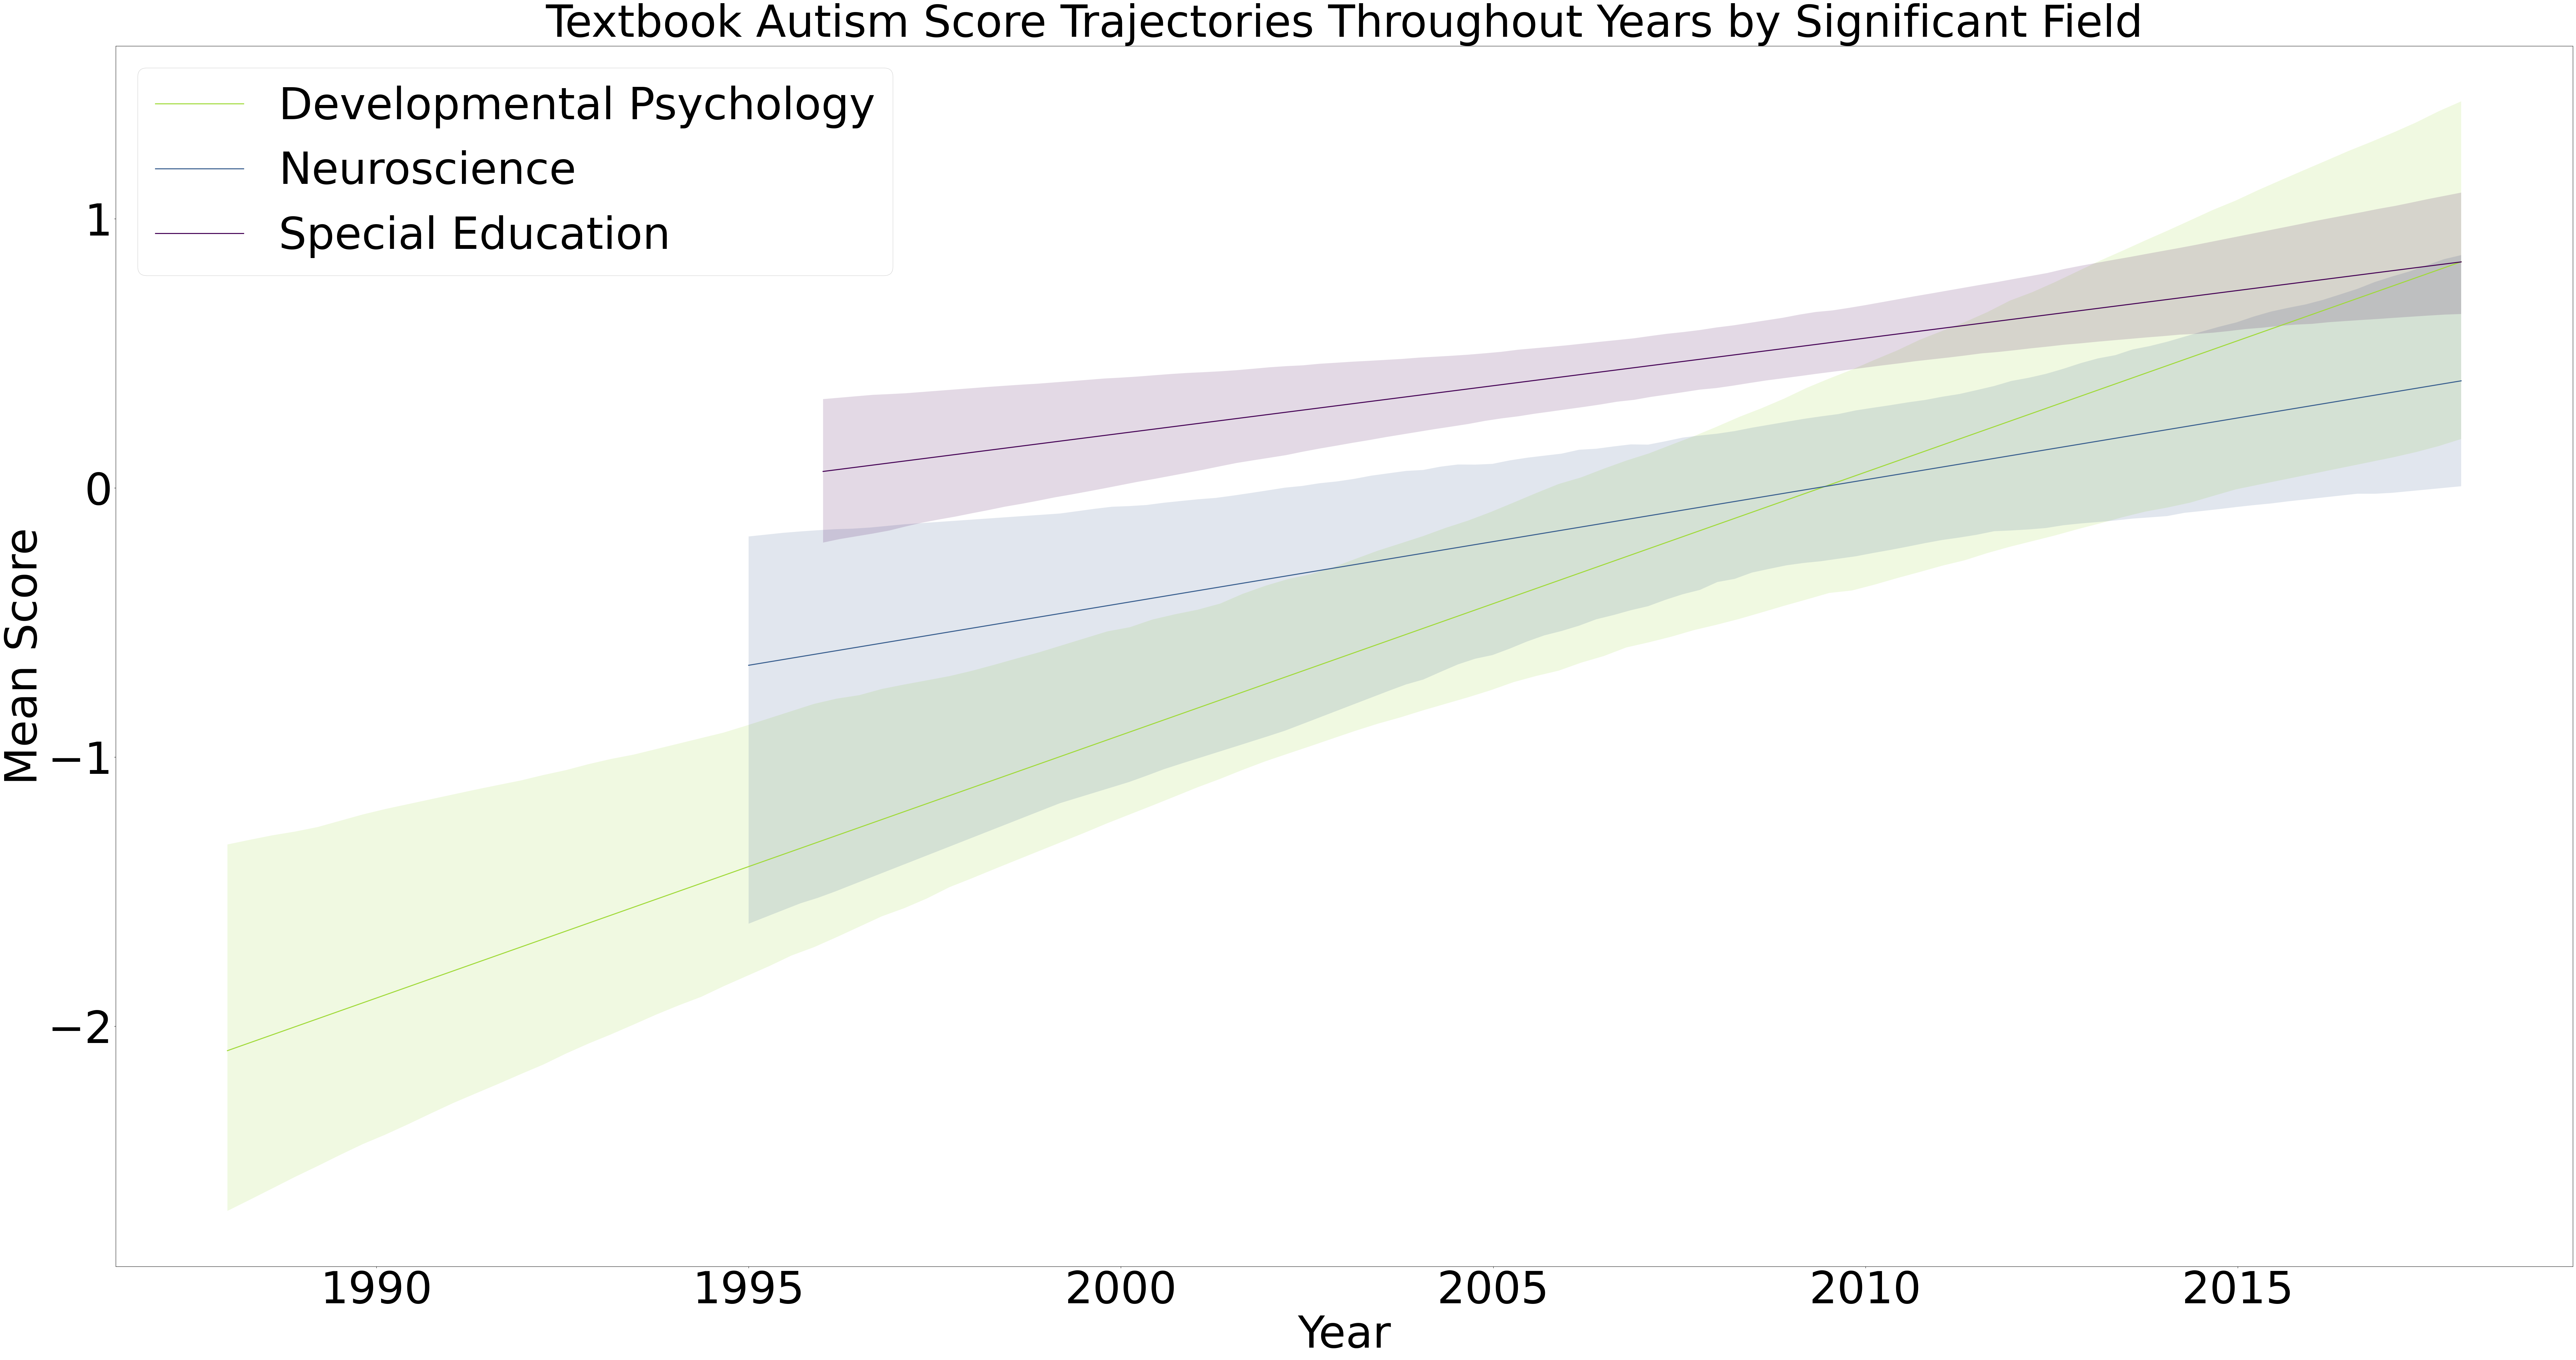

In [28]:
os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(100, 50)) 


# sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[0], marker="None")
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[1], scatter=False, label = "Developmental Psychology", color="#a0da39") # Significant
# sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[2])
# sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[3], marker="None")
# sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[4], marker="None")
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[5], scatter=False, label = "Neuroscience", color = "#365c8d") # Significant
# sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[6], marker="None")
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[7], scatter=False, label = "Special Education", color="#440154") # Significant

# ax.set_xticks(book_years.values())
ax.set_title("Textbook Autism Score Trajectories Throughout Years by Significant Field", fontsize=100)

ax.legend(loc="upper left", fontsize=100)

# ax.legend(title="Field", labels=["Developmental Psychology", "Neuroscience", "Special Education"])

# ax.legend(title="Field", labels=["Abnormal Psychology", "Developmental Psychology", "Human Sexuality", 
#                                   "Introductory Psychology", "Neuroscience", "Social Psychology", "Special Education"])
plt.xlabel("Year", fontsize=100)
plt.ylabel("Mean Score", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
plt.savefig('years_regression_autism_chatgpt_fields_significant.png')

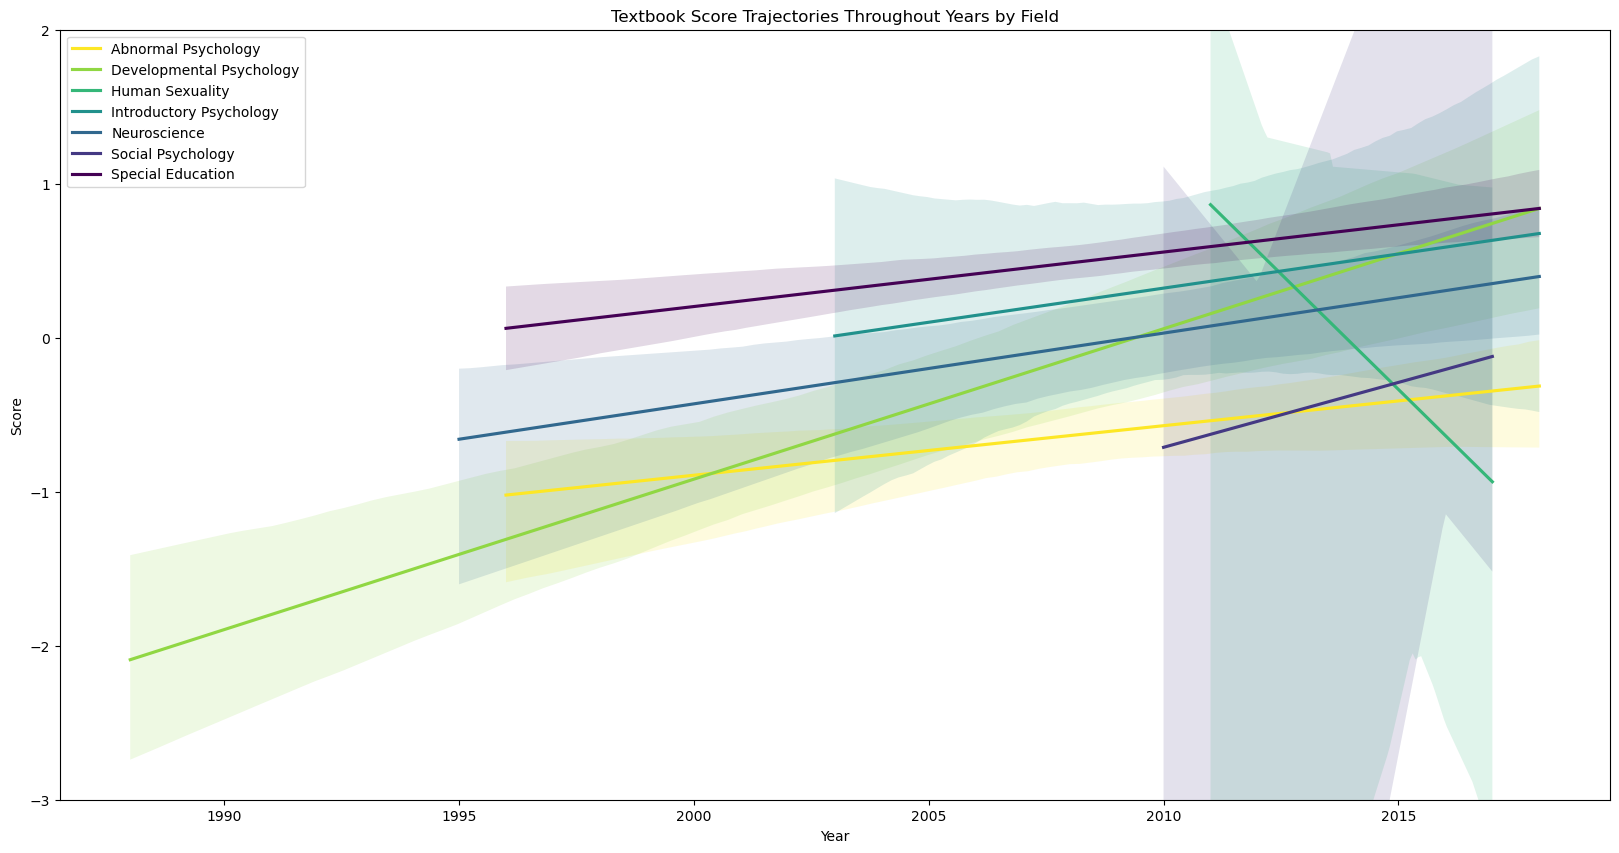

In [45]:
# sns.color_palette("Spectral", as_cmap=True)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[0], scatter=False, label = "Abnormal Psychology", color="#fde725")
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[1], scatter=False, label = "Developmental Psychology", color="#a0da39") # Significant
# sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[2])
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[3], scatter=False, label = "Human Sexuality", color="#1fa187")
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[4], scatter=False, label = "Introductory Psychology", color="#277f8e")
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[5], scatter=False, label = "Neuroscience", color="#365c8d") # Significant
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[6], scatter=False, label = "Social Psychology", color="#46327e")
sns.regplot(ax = ax, x="Year", y="Score", data=year_scores[7], scatter=False, label = "Special Education", color="#440154") # Significant

# ax.set_xticks(book_years.values())
ax.set_title("Textbook Score Trajectories Throughout Years by Field")

ax.legend(loc = "upper left")
plt.ylim(-3, 2)

# ax.legend(title="Field", labels=["Developmental Psychology", "Neuroscience", "Special Education"])

# ax.legend(title="Field", labels=["Abnormal Psychology", "Developmental Psychology", "Human Sexuality", 
#                                   "Introductory Psychology", "Neuroscience", "Social Psychology", "Special Education"])
plt.savefig('years_regression_autism_chatgpt_fields_all.png')

In [9]:
# # Does length of passage matter?

# os.chdir(textbook_dir)

# # Function to get full text
# def getText(filename):
#     doc = docx.Document(filename)
#     fullText = []
#     for para in doc.paragraphs:
#         fullText.append(para.text)
#     return fullText

# # Dictionary filled with text for all the books, minus the titles
# title_text = {}
# for book in textbooks:
#     total_text = getText(book)
#     text_without_title = total_text[4:]
#     for piece in text_without_title:
#         if piece == '':
#             text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
# #     text_without_title.remove('')
#     title_text[book] = text_without_title
    
    
# # Remove stop words from each book

# stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

# os.chdir(stopwords_dir)

# f = open("stop_words_english_original.txt", "r", encoding="utf-8")
# stopwords = []
# for text in f:
#     text = text.replace('\n', '')
#     stopwords.append(text)


# punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# # Function to clean up text and remove stopwords
# def clean(book):
#     text_list = title_text[book]
#     new_text_list = []
    
#     # Clean up text
#     for text in text_list:
#         text = text.strip()
#         text = text.lower()
#         text = text.split(' ')
#         new_text_list.append(text)


#     newer_text_list = []
    
#     # Remove punctuation
#     for sentence in new_text_list:
#         for word in sentence:
#             for char in punc:
#                 if char in word:
#                     word = word.replace(char, '')
#             newer_text_list.append(word)
                
#     # Remove stop words
#     newest_text_list = []
#     for words in newer_text_list:
#         if words not in stopwords:
#             newest_text_list.append(words)

#     # Remove blanks
#     for w in newest_text_list:
#         if len(w) == 0:
#             newest_text_list.remove(w)
            
#     return newest_text_list

# # Update all the books with their clean, stopword-less counterparts

# clean_texts = {}
# for book in title_text:
#     newest_text_list = clean(book)
#     clean_texts[book] = newest_text_list
    
# # Find length of all texts
# lengths = {}
# for book in clean_texts:
#     length_of_text = len(clean_texts[book])
#     lengths[book] = length_of_text
    
# print(lengths)

In [10]:
# print(max(lengths.values()))

In [11]:
# df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

In [12]:
# length_df = df
# print(length_df)

# # Add the lengths of the books to the dataframe
# length_df["Length"] = length_df["Textbook"].map(lengths)

# print(length_df[length_df["Length"] > 4000])

In [13]:


# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

# sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Score")

# # Remove special education and abnormal
# secondary_df = length_df[length_df["Field"] != "Spcl"]
# tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

In [14]:
# # What about raw scores and length?
# os.chdir(results_dir)

# raw_df = pd.read_csv("raw_sentiments_01_04_2024.csv", low_memory=False)

# print(raw_df)

# raw_df["Length"] = length_df["Length"]
# raw_df["Field"] = length_df["Field"]

# # length_df2 = length_df

# # # Add the lengths of the books to the dataframe
# # length_df2["Raw_Score"] = raw_df["Raw_Score"].map(books)

# # print(length_df2)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 4)) 

# sns.scatterplot(ax=ax[0], data=raw_df, x="Length", y="Raw_Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Raw Score")

# # Remove special education and abnormal
# secondary_df2 = raw_df[raw_df["Field"] != "Spcl"]
# tertiary_df2 = secondary_df2[secondary_df2["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df2, x="Length", y="Raw_Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Raw Score (Excluding Special Ed. and Abnormal)")

In [15]:
# # Overall

# overall_df = df

# overall_df["Year"] = overall_df["Textbook"].map(book_years)

# fields = []
# for author in overall_df["Author"]:
#     field = author.split("_")[0]
#     fields.append(field)

# overall_df["Field"] = fields

# print(overall_df)

# fig, ax = plt.subplots(figsize=(20,20))

# sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")